In [1]:
# python p1s7.py --train train.csv --test test.csv --out preds.txt
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
!pip install pandas

     ---------------------------------------- 10.0/10.0 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 500.6/500.6 kB 3.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\kulka\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import scipy
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

Part 1.1
Understanding the data: Start with plotting the underlying pairwise-correlation between
the variables

In [ ]:
df=pd.read_csv("train.csv")

In [ ]:
print(df.head())

In [ ]:
x1=df.iloc[:,:-1].values
y1=df.iloc[:,-1].values

In [ ]:
plt.xlabel("x1")
plt.ylabel("y1")
plt.scatter(df.x1,y1)
plt.show()
plt.xlabel("x2")
plt.ylabel("y1")
plt.scatter(df.x2,y1)
plt.show()
plt.xlabel("x3")
plt.ylabel("y1")
plt.scatter(df.x3,y1)
plt.show()
plt.xlabel("x4")
plt.ylabel("y1")
plt.scatter(df.x4,y1)
plt.show()
plt.xlabel("x5")
plt.ylabel("y1")
plt.scatter(df.x5,y1)
plt.show()
plt.xlabel("x6")
plt.ylabel("y1")
plt.scatter(df.x6,y1)
plt.show()


Part 1.1

In [ ]:
df.drop('t',axis=1,inplace=True)
sns.heatmap(df._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdYlGn', linewidths=.25,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

In [ ]:
df.corr().iloc[3].sort_values(ascending= False)

In [ ]:
row=100
X_train=x1[:row]
X_val=x1[row:]
y_train=y1[:row]
y_val=y1[row:]

def score(model,test,name='default'):
    model.fit(X_train,y_train)
    ypred=model.predict(test)
    print(name)
    print('Accuracy of training set: ',round(model.score(X_train,y_train)*100,2))
    print('Accuracy of test set: ',round(model.score(X_val,y_val)*100,2))
    print('mean squared error: ',round(mean_squared_error(y_val,ypred)/100,2))
    print('mean absolute error: ',round(mean_absolute_error(y_val,ypred),2))
    print('r2_score: ',round(r2_score(y_val,ypred)*100,2))

le=LinearRegression()
score(le,X_val,name='Linear Regression')

part 1.2
Effect of batch size: Implement vanilla (without regularization) least-squares based regression using a) Stochastic Gradient Descent (SGD) and b) Batch Gradient Descent1
. Report
the weights in each strategy. Plot the loss curve with respect to different batch sizes. Report
the difference in convergence of gradient descent (if any) on by varying the batch size.


stochastic gradient descent : 



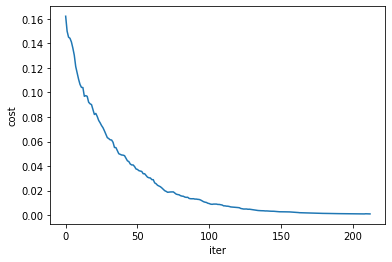

theta for stochastic gradient descent: 
 [[ 0.45539433]
 [ 0.05340427]
 [ 0.09281292]
 [ 0.42487828]
 [ 0.08533734]
 [-0.00088933]
 [-0.01715684]]
batch gradient descent : 

theta for batch gradient descent: 
 [[ 0.46611697]
 [ 0.05153487]
 [ 0.0955369 ]
 [ 0.40928998]
 [ 0.07934725]
 [-0.00308621]
 [-0.0177802 ]]


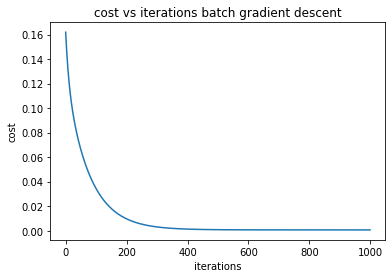

In [17]:
def read_data(datafile):
    df=pd.read_csv(datafile)
    x1=df.iloc[:,:-1].values
    y1=df.iloc[:,-1].values
    return x1,y1

def addbias(x1):
    c=np.size(x1,axis=0)
    x=np.ones(shape=(c,1))
    x=np.column_stack((x,x1))
    return x

def normalize(x):
    maxx=np.amax(x,axis=0)
    x=x/maxx
    return maxx,x

def pre_process(x,y):
    x=addbias(x)
    y=np.array(y)
    max_x,x=normalize(x)
    max_y,y=normalize(y)
    return max_x,x,max_y,y

def compute_cost(x,y,theta):
    m=np.size(x,axis=0)
    n=np.size(x,axis=1)
    y=y.reshape(m,1)
    x=x.reshape(m,n)
    h=np.dot(x,theta)
    loss=np.dot((h-y).T,(h-y))
    cost=loss/(2*m)
    return cost

#shuffle data
def shuffle_data(x,y):
    data=np.column_stack((x,y))
    np.random.shuffle(data)
    x=data[:,:-1]
    y=data[:,-1]
    return x,y


def stochastic_gradient_descent(x,y,epochs,precision,alpha=0.01,iterations=1):
    m=np.size(x,axis=0)
    n=np.size(x,axis=1)
    theta=np.zeros(shape=(n,1))
    # cost=np.zeros(shape=(m*iterations,1))
    # iter=np.zeros(shape=(m*iterations,1))
    cost=[]
    iter=[]

    #np.zeros(shape=(iterations//100 +1,2))
    #shuffle data
    j=0
    e=0
    itrn=0
    x,y=shuffle_data(x,y)
    while(e<=iterations):
        for i in range(m):
            h=np.dot(x[i],theta)
            theta=theta-alpha*np.dot(x[i].T.reshape(n,1),(h-y[i]).reshape(1,1))
            if(i%2==0 and compute_cost(x,y,theta)[0][0]>1e-3):
                cost.append(compute_cost(x,y,theta)[0][0])
                # cost[j]=compute_cost(x,y,theta)
                # iter[j]=i*(e+1)
                iter.append(itrn)
                # iter[j]=itrn
                j=j+1
                itrn+=1
            #append cost
            #cost[i]=compute_cost(x,y,theta)
            #if (cost[i][0] <= precision):
            #    break
        e+=1
    # print('cost: ',cost)
    # print('iterations: ',iter)
    #plot cost vs iter
    plt.xlabel("iter")
    plt.ylabel("cost")
    plt.plot(iter,cost)
    plt.show()
    ''' for i in range(iterations):
        for j in range(m):
            rand=np.random.randint(0,m)
            x_rand=x[rand,:].reshape(1,n)
            y_rand=y[rand].reshape(1,1)
            h=np.dot(x_rand,theta)
            theta=theta-alpha*np.dot(x_rand.T.reshape(n,1),(h-y_rand).reshape(1,1))
        # for j in range(m):
        #     h=np.dot(x[j],theta)
        #     #print(x[j].shape,theta.shape,h.shape)
        #     theta=theta-(alpha/m)*np.dot(x[j].T.reshape(n,1),(h-y[j]).reshape(1,1))
        cost[i]=compute_cost(x,y,theta)
        if (cost[i] <= precision):
            break'''
    return theta,cost

def batch_gradient_descent(x,y,precision,alpha=0.01,iterations=1000):
    m=np.size(x,axis=0)
    n=np.size(x,axis=1)
    theta=np.zeros(shape=(n,1))
    cost=np.zeros(shape=(iterations,1))
    for i in range(iterations):
        h=np.dot(x,theta)
        theta=theta-(alpha/m)*np.dot(x.T,(h-y.reshape(m,1)))
        cost[i]=compute_cost(x,y,theta)
        if (cost[i] <= precision):
            break
    return theta,cost
#plot 2d array cost[i][0] vs cost[i][1]
def plot2(cost,gd):
    print(cost)
    plt.plot(cost[:,1],cost[:,0])
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.title("cost vs iterations "+ gd)
    plt.show()
   
def plot(cost,gd):
    plt.plot(cost)
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.title("cost vs iterations "+ gd)
    plt.show()

def part2_main():
    x1,y1=read_data("train.csv")
    max_x,x,max_y,y=pre_process(x1,y1)
    print("stochastic gradient descent : \n")
    theta_sgd,cost_sgd=stochastic_gradient_descent(x,y,1,0.0001)
    
    print("theta for stochastic gradient descent: \n",theta_sgd)
    #plot2(cost_sgd,"stochastic gradient descent")

    print("batch gradient descent : \n")
    #theta_bgd,cost_bgd,theta_his=batch_gradient_descent1(x,y,[0,0,0,0,0,0,0])
    theta_bgd,cost_bgd=batch_gradient_descent(x,y,0.0001)
    print("theta for batch gradient descent: \n",theta_bgd)
    plot(cost_bgd,"batch gradient descent")
    
part2_main()

Part 1.3
Effect of Regularization: In this sub-task, perform minimization of the cost function using
a) lasso regression and b) ridge regression and learn the weights using SGD. Determine the
value of the regularization parameter (λ) in both the cases. Plot/Report the weights in both
the cases. Is there any intuitive difference

In [ ]:
#ridge cost
def ridge_cost(x,y,theta,alpha):
    m=np.size(x,axis=0)
    n=np.size(x,axis=1)
    cost=compute_cost(x,y,theta)
    reg=cost+alpha*np.dot(theta.T,theta)
    return reg
#lasso cost
def lasso_cost(x,y,theta,alpha):
    m=np.size(x,axis=0)
    cost=compute_cost(x,y,theta)
    reg=cost+alpha*np.sum(np.abs(theta))
    return reg
#caluculate regularization parameter
def regularization_parameter(x,y,theta):
    m=np.size(x,axis=0)
    h=np.dot(x,theta)
    reg=(1/m)*np.sum(np.abs(h-y))
    return reg
# ridge regression
def ridge_regression(x,y,alpha):
    m=np.size(x,axis=0)
    n=np.size(x,axis=1)
    theta=np.zeros(shape=(n,1))
    theta=np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)+alpha*np.identity(n)),x.T),y)
    return theta
#lasso regression
def lasso_regression(x,y,alpha):
    m=np.size(x,axis=0)
    n=np.size(x,axis=1)
    theta=np.zeros(shape=(n,1))
    theta=np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)+alpha*np.identity(n)),x.T),y)
    return theta
# stocastic gradient descent with lasso
def sgd_lasso(x,y,alpha,precision,iterations=1000):
    m=np.size(x,axis=0)
    n=np.size(x,axis=1)
    theta=np.zeros(shape=(n,1))
    cost=np.zeros(shape=(iterations,1))
    for i in range(iterations):
        for j in range(2):
            rand=np.random.randint(0,m)
            x_rand=x[rand,:].reshape(1,n)
            y_rand=y[rand].reshape(1,1)
            h=np.dot(x_rand,theta)
            theta=theta-lasso_regression(x_rand,y_rand,alpha)
        cost[i]=lasso_cost(x,y,theta,alpha)
        if (cost[i] <= precision):
            break
    return theta,cost,regularization_parameter(x,y,theta)

#stocastic gradient descent with ridge
def sgd_ridge(x,y,alpha,precision,iterations=1000):
    m=np.size(x,axis=0)
    n=np.size(x,axis=1)
    theta=np.zeros(shape=(n,1))
    cost=np.zeros(shape=(iterations,1))
    for i in range(iterations):
        for j in range(2):
            rand=np.random.randint(0,m)
            x_rand=x[rand,:].reshape(1,n)
            y_rand=y[rand].reshape(1,1)
            h=np.dot(x_rand,theta)
            theta=theta-(alpha/m)*ridge_regression(x_rand,y_rand,alpha)
        cost[i]=ridge_cost(x,y,theta,alpha)
        if (cost[i] <= precision):
            break
    return theta,cost,regularization_parameter(x,y,theta)

#main function for part 3
def part3_main():
    x1,y1=read_data("train.csv")
    max_x,x,max_y,y=pre_process(x1,y1)
    print("stochastic gradient descent with lasso : \n")
    theta_sgd_lasso,cost_sgd_lasso,reg_sgd_lasso=sgd_lasso(x,y,0.0001,0.0001)
    print("theta for stochastic gradient descent with lasso: \n",theta_sgd_lasso)
    print("regularization parameter for stochastic gradient descent with lasso: \n",reg_sgd_lasso)
    plot(cost_sgd_lasso,"SGD with lasso")
    
    print("stochastic gradient descent with ridge : \n")
    theta_sgd_ridge,cost_sgd_ridge,reg_sgd_ridge=sgd_ridge(x,y,0.0001,0.0001)
    print("theta for stochastic gradient descent with ridge: \n",theta_sgd_ridge)
    print("regularization parameter for stochastic gradient descent with ridge: \n",reg_sgd_ridge)
    plot(cost_sgd_ridge,"SGD with ridge")

part3_main()

part 1.4
Feature Engineering Keeping subtask 1 in consideration, can you improvise the regularized
version of the cost function? You are allowed to experiment with your own cost function (other
than sum-of-squares error). If yes, report the weights in this improved version.


In [ ]:
lambda_reg=615
#feature engineering
def feature_engineering(x):
    m=np.size(x,axis=0)
    n=np.size(x,axis=1)
    x_new=np.zeros(shape=(m,4))
    x_new[:,0]=x[:,1]
    x_new[:,1]=x[:,3]
    x_new[:,2]=x[:,4]
    x_new[:,3]=x[:,5]
    return x_new
#main function for part 4
def part4_main():
    x1,y1=read_data("train.csv")
    x1=feature_engineering(x1)
    max_x,x,max_y,y=pre_process(x1,y1)
    print("SGD with lasso and feature engineering : \n")
    theta_sgd_lasso,cost_sgd_lasso,reg_sgd_lasso=sgd_lasso(x,y,0.0001,0.0001)
    print("theta for SGD with lasso and feature engineering: \n",theta_sgd_lasso)
    print("regularization parameter for SGD with lasso and feature engineering: \n",reg_sgd_lasso)
    plot(cost_sgd_lasso,"SGD with lasso")

part4_main()

 part 1.5
 Effect on sample distribution: Train the regression model (without any regularization)
using SGD taking 10%, 20%, 30%, 40% and 50% samples (randomly drawn out of the dataset)
for training. Plot/Report the test accuracy in each sampled subsets using the testset given.
What do you observe when using such a truncated population distribution?


In [ ]:
def predict(x,theta,y_max):
    y_pred=x.dot(theta)
    return y_pred#*y_max

def prediction_error(pred_model,pred):
    err= np.mean((pred_model-pred)**2)
    print("error : \n"+ str(err))
#calculate % accuracy
def accuracy(pred_model,pred): 
    acc=100-np.mean(np.abs((pred_model-pred)/pred))*100
    print("accuracy : \n"+ str(acc))

def plot(cost,gd):
    plt.plot(cost)
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.title("cost vs iterations "+ gd)
    plt.show()



#randomly draw % of data for testing
def divide_data(x,y,train_percent):
    #x,y=shuffle_data(x,y)
    train_size=int(np.size(x,axis=0)*train_percent/100)
    x_train=x[:train_size,:]
    y_train=y[:train_size]
    x_test=x[train_size:,:]
    y_test=y[train_size:]
    return x_train,y_train,x_test,y_test

def part5_main():
    x1,y1=read_data("train.csv")
    max_x,x,max_y,y=pre_process(x1,y1)
    sample_space=[10,20,30,40,50]
    for size in range(len(sample_space)):
        sample_size=sample_space[size]
        print("\nsample size : "+str(sample_size) + " %")
        x_train,y_train,x_test,y_test=divide_data(x,y,sample_size)
        print("\nstochastic gradient descent : \n")
        theta_sgd,cost_sgd=stochastic_gradient_descent(x_train,y_train,1,0.0001)
        y_pred=predict(x_test,theta_sgd,max_y)
        #y_test=y_test*max_y
        prediction_error(y_pred,y_test)
        accuracy(y_pred,y_test)
        print("theta for stochastic gradient descent: \n",theta_sgd)
        #plot(cost_sgd," sgd "+str(sample_size))
part5_main()

part 1.6
Estimate the variance in the noise. Report the strategy for estimation.

In [ ]:
#estimate variance in the noise
def estimate_variance(x,y,theta):
    m=np.size(x,axis=0)
    n=np.size(x,axis=1)
    y_pred=x.dot(theta)
    err=np.mean((y_pred-y)**2)
    var=err*(1/m)*np.linalg.inv(x.T.dot(x))
    return var

#part 6 main function
def part6_main():
    x1,y1=read_data("train.csv")
    max_x,x,max_y,y=pre_process(x1,y1)
    print("\nstochastic gradient descent : \n")
    theta_sgd,cost_sgd=stochastic_gradient_descent(x,y,1,0.0001)
    print("theta for stochastic gradient descent: \n",theta_sgd)
    var=estimate_variance(x,y,theta_sgd)
    print("variance in the noise : \n",var)

part6_main()


Part 1.7
Optimal weights: Using the empirical approach and the intuition you have developed so far,
use a scheme (of your choice) to find the most optimal weights to the regression function for
this dataset. This may include adding other penalty terms to some weights, or customizing
the cost function, etc. Every solution is acceptable as long as it is within the bounds of the
definition of multivariate linear regression. Report the weights using the strategy that
you have followed. You are encouraged to try cross-validation, hyperparameter tuning and
regularization to improve the results.

In [ ]:
#strategy to find the best lambda
def find_best_lambda(x,y):
    m=np.size(x,axis=0)
    n=np.size(x,axis=1)
    theta=np.zeros(shape=(n,1))
    alpha=0.0001
    precision=0.0001
    cost=np.zeros(shape=(1000,1))
    for i in range(1000):
        theta=theta-alpha*(x.T.dot(x.dot(theta)-y))
        cost[i]=ridge_cost(x,y,theta,alpha)
        if (cost[i] <= precision):
            break
    var=estimate_variance(x,y,theta)
    lambda_reg=1/(2*var)
    return lambda_reg

#calculate optimal theta 
def optimal_theta(x,y):
    lambda_reg=find_best_lambda(x,y)
    theta=np.linalg.inv(x.T.dot(x)+lambda_reg*np.identity(np.size(x,axis=1))).dot(x.T).dot(y)
    return theta

#part 7 main function
def part7_main():
    x1,y1=read_data("train.csv")
    max_x,x,max_y,y=pre_process(x1,y1)
    theta=optimal_theta(x,y)
    print("theta for optimal theta: \n",theta)
    y_pred=predict(x,theta,max_y)
    prediction_error(y_pred,y)
    accuracy(y_pred,y)

part7_main()